# Universidade Federal do Rio Grande do Norte

##  Processamento Digital de Sinais 

### Simulação Computacional - Amostragem periódica - Matlab

**Aluno:**  Lucas Bezerra Dantas Saraiva

**Professor:**  Luiz Felipe de Queiroz Silveira

**Data de entrega :**  20/10/2017


--------
### Amostragem

A amostragem é um processo completamente reversível, que pode ser desfeito sem perdas. Isso significa que o conjunto de amostras pode ser usado para reconstruir completamente o sinal contínuo. Para que isso ocorra, o processo de amostragem deve obedecer algumas regras. 

> Dado um sinal contínuo $m(t)$ com largura de banda $B$, desde que a frequência de amostragem seja maior que dobro da largura de banda ($f_{s}$ > 2B) é possível recuperar o sinal contínuo perfeitamente a partir do sinal amostrado (Teorema de Nyquist). 

> O sinal amostrado deve ser limitado em banda. Essa segunda regra pode ser garantida com um filtro passa-baixa aplicado ao sinal contínuo antes da amostragem.

Essas regras devem ser obedecidas para evitar o _aliasing_ (mascaramento), que nada mais é que a sobreposição das cópias espectrais resultantes do processo de amostragem. Nesta prática, veremos esse efeito em um sinal exponencial.

O código a seguir mostra a maneira genérica de gerar um sinal senoidal no Matlab. Dessa maneira, dependedo do referencial temporal, podemos modelar um sinal contínuo no tempo (taxa amostragem alta). Contudo, isso é somente um modelo, pois, na realidade, todos os sinais em um computador são discretos.


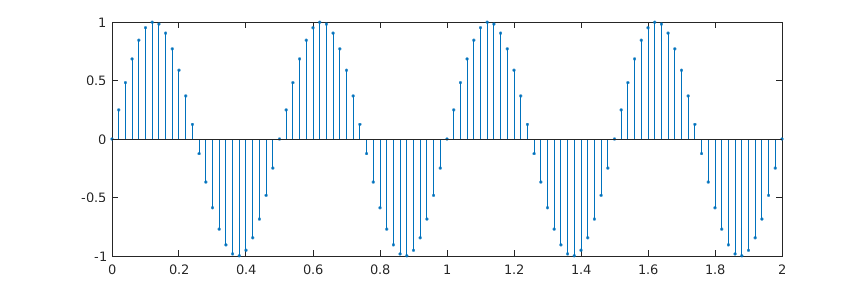

In [28]:
Ts = 0.02;                                          % Período de amostragem
t = 0:Ts:2;                                         % Eixo do tempo
m = sin(2*pi*2*t);                                  % Sinal m(t)
fig = figure;
stem(t,m,'.');
fig.PaperUnits = 'inches';
fig.PaperPosition = [0 0 9 3];

O sinal $m(t)$ construído acima não é contínuo no tempo, mas discreto. Contudo, depedendo da maneira que o sinal é mostrado (função stem ou função plot), sua visualização no domínio do tempo é diferente.  Isso ocorre porque a função $plot$ liga os pontos do vetor por meio de retas, dando a visualização de um sinal contínuo. Contudo, a amostra em $t = 0.01$, simplesmente, não existe, pois o eixo temporal foi construído em passos de $0.02$. 


## Subamostragem e Sobreamostragem

A importância da sobreamostragem e subamostragem está na adequação do rítmo das amostras numa cadeia de processamento digital de sinais envolvendo hardwares diferentes. Podemos ter situações que hardwares com diferentes capacidades de processamento tenham que, ao trabalharem em conjunto no mesmo sinal, realizar mudanças de taxa de amostragem para adequar o envio/recebimento de amostras no ritmo que eles consigam trabalhar. Como por exemplo a placa de som de um computador. Trabalhando numa frequência de $f=44.1 kHz$ precisam que os softwares que a usam mandem amostras nesse ritmo para que não distorça o sinal de áudio.

O processo de amostragem será baseado na amostragem ensinada no [Lathi](https://www.amazon.com/Digital-Communication-Electrical-Computer-Engineering/dp/0195331451). Será feito uso de duas funções do Matlab: ** Downsample** e **Upsample**.

A função **downsample** do Matlab coleta amostras em um intervalo de $N$ elementos, especificado como parâmetro

In [6]:
N = 10;                                             % Número de amostras puladas
x=0:1:100;                                          % Vetor com número inteiros de 0 à 100, de 1 em 1
y= downsample(x,N);                                 % Coleta 1 elemento a cada 10 elementos do vetor
disp(y);

     0    10    20    30    40    50    60    70    80    90   100



Similarmente, a função **upsample** do Matlab aumenta o vetor preenchendo com zeros $(N - 1)$ elementos entre as amostras do vetor de entrada.

In [7]:
x=1:1:10;                                            % Vetor com inteiros de 1 a 10
N = 3;                                               % Número de sobreamostragem
y = upsample(x,N);                                   % Coloca 1 amostra a cada (N-1) elementos
disp(y);

  Columns 1 through 13

     1     0     0     2     0     0     3     0     0     4     0     0     5

  Columns 14 through 26

     0     0     6     0     0     7     0     0     8     0     0     9     0

  Columns 27 through 30

     0    10     0     0



O uso em conjunto dessas duas funções permite simular a amostragem ideal (retornando imediatamente para zero).


# Experimento:


Queremos fazer a amostragem do sinal $x(t)=e^{-1000\left | t \right |}$. Primeiramente queremos saber qual a banda mínima do sinal para que não sofra sobreposição espectral calculando pela definição da DTFT. Temos que 

$$ X(\Omega)=\int_{-\infty}^{\infty}x(t)\cdot e^{-j \Omega t} dt$$

Aplicando  a $x(t)$

$$ X(\Omega)=\int_{-\infty}^{\infty} e^{-1000\left | t \right |} \cdot e^{-j \Omega t} dt$$

Podemos representar $ \left |t \right | = \left \{ \begin{align*}t &, t \geq 0 \\-t &, t \geq 1 \end{align*} \right.$ então podemos representar $x(t)$ como:

$$ x(t) = e^{-1000|t| } = \left \{ \begin{align*} &e^{-1000t }, &t\geq0\\&e^{1000t }  , &t\leq0\end{align*} \right.$$

Aplicando a propriedade da transformada da soma igual a soma das transformadas

$$ X(\Omega)=\int_{0}^{\infty}e^{-1000 t }  \cdot e^{-j \Omega t} dt + \int_{-\infty}^{0}e^{1000 t}  \cdot e^{-j \Omega t} dt $$


Obtem-se no domínio $\Omega$
$$X(\Omega)=\frac{e^{-t(1000+j\Omega)}}{-1000-j\Omega}\left.\begin{matrix}\\\\\end{matrix}\right|_{0}^{\infty} + \frac{e^{t(1000-j\Omega)}}{1000-j\Omega}\left.\begin{matrix}\\\\\end{matrix}\right|_{-\infty}^{0}$$


$$ = \frac{e^{-\infty}-e^{0}}{-(1000+j\Omega)} +\frac{e^{0}-e^{-\infty}}{(1000-j\Omega)} $$

$$= \frac{1}{(1000+j\Omega)} +\frac{1}{(1000-j\Omega)}$$

Finalmente

$$X(\Omega)= \frac{2000}{(10^{6}+\Omega)}$$
Podemos simular o sinal em frequência $X(\Omega)$ e ver até onde é conveniente levar em consideração a amplitude. O critério será usado como $X(\Omega_{e})= 1\% \left|X(\Omega) \right |$.


ans =

       -9950



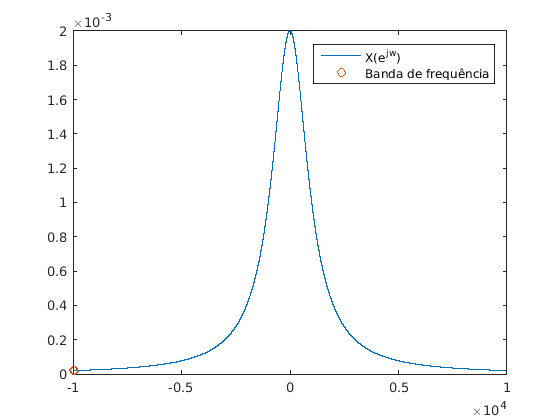

In [17]:
clc;clear all;close all;
%% Parâmetros
Omega=-10000:1:10000;                                               % Montagem do eixo ômega
X_Omega=2000./(1e6+Omega.^(2));                                     % Espectro de x(t)
indice=find(X_Omega(1,1:length(X_Omega)/2) <= 0.01*max(X_Omega));   % Encontra indice onde X(Omega)<0.01*X(Omega)
plot(Omega,X_Omega,Omega(indice),X_Omega(indice),'o')               % Mostra gráfico e pontos
Omega(max(indice))                                                  % Display valor de frequência
legend('X(e^{jw})','Banda de frequência')

Então encontramos que a banda a ser considerada é de $ B_{e} =  \frac{\Omega}{2\pi} \approx \frac{10kHz}{2\pi}$.
Devemos encontrar uma frequencia de amostragem 

$$f_{s}\geq 2B_{e}   \therefore T_{s}\leq \frac{1}{2B_{e}}$$

Então, faremos a simulação respeitando esses critérios assumindo $T_{s} > 6.2832 .10^{-4} $. Também $N=T_{0}/T_{s}$ em que $N$ é o número de elementos. Porém, para que possa ser mais visível o efeito do aliasing, faremos $T_{s}=10T_{min}$

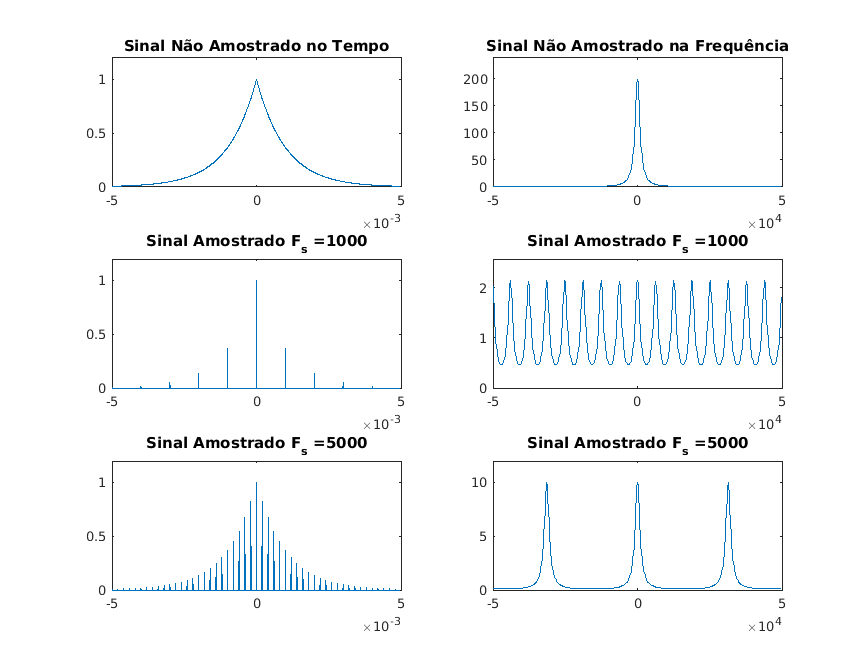

In [23]:
clc;clear all;close all;
%% Parâmetros
Ts_min=1/1e4;                                               % Taxa de amostragem mínima Fs_min= 10kHz
Ts=Ts_min/10;                                               % Taxa de amostragem Fs = 100kHz
t_0=5e-3;                                                   % Tempo de "Período" do sinal
N_ele=t_0/Ts;                                               % Número de elementos do Sinal
fs=1/Ts;                                                    % Frequência de amostragem
t=-t_0:1/fs:t_0-1/fs;                                       % Eixo do tempo
xv=exp(-1000*abs(t));                                       % Sinal x(n)
% Plotting
fig=figure;
fig.PaperUnits = 'inches';
fig.PaperPosition = [0 0 9 7];
subplot(3,2,1)
plot(t,xv)
title('Sinal Não Amostrado no Tempo')
axis([-t_0 t_0 0 1.2*max(abs(xv))])

%% Aplicando a transformada de Fourier ao sinal 500kHz - No_return-to-zero
freq=-fs/2:fs/N_ele:fs/2-1/fs;                              % Montagem do eixo da frequência
Xa=dtft(xv,t,freq);                                         % Espectro do sinal DTFT
% Plotting
subplot(3,2,2)
plot(freq,abs(Xa))
title('Sinal Não Amostrado na Frequência')
axis([-50000 50000 0 1.2*max(abs(Xa))])

%% Amostragem 1kHz
fs1k=1000;                                                  % Nova frequência de amostragem 1kHz
N=round(fs/fs1k);                                           % Números de elementos pulados
x_samp1=downsample(xv,N);                                   % Coleta 1 amostra a cada N_samp amostras do sinal 
x_samp1=upsample(x_samp1,N);                                % Retorna vetor amostrado com o número inicial de elementos
x_samp1=x_samp1(1,1:length(t));                             % Corrige comprimento de vetores
% Plotting
subplot(3,2,3)
plot(t,x_samp1(1,1:length(t)))                 
title(['Sinal Amostrado F_{s} =' num2str(fs1k)])
axis([-t_0 t_0 0 1.2*max(abs(x_samp1))])

%% Aplicando a transformada de Fourier ao sinal Amostrado 1kHz
Xa1=dtft(x_samp1,t,freq);                                   % Espectro do sinal DTFT
% Plotting
subplot(3,2,4)
plot(freq,abs(Xa1))
title(['Sinal Amostrado F_{s} =' num2str(fs1k)])
axis([-50000 50000 0 1.2*max(abs(Xa1))])

%% Amostragem 5kHz
fs5k=5000;                                                  % Nova frequência de amostragem 5kHz
N=round(fs/fs5k);                                           % Numeros de elementos pulados
x_samp5=downsample(xv,N);                                   % Coleta 1 amostra a cada N_samp amostras do sinal 
x_samp5=upsample(x_samp5,N);                                % Retorna vetor amostrado com o número inicial de elementos
x_samp5=x_samp5(1,1:length(t));                             % Corrige comprimento de vetores
% Plotting
subplot(3,2,5)
plot(t,x_samp5(1,1:length(t)))        
title(['Sinal Amostrado F_{s} =' num2str(fs5k)])
axis([-t_0 t_0 0 1.2*max(abs(x_samp5))])

%% Aplicando a transformada de Fourier ao sinal Amostrado 5kHz
Xa5=dtft(x_samp5,t,freq);                                   % Espectro do sinal DTFT   
% Plotting
subplot(3,2,6)
plot(freq,abs(Xa5))
title(['Sinal Amostrado F_{s} =' num2str(fs5k)])
axis([-50000 50000 0 1.2*max(abs(Xa5))])

O sinal amostrado a $f_{s}=1kHz$ sofreu aliasing visto que não está tocando o eixo $0$. Isso implica dizer que a cauda das componentes laterais estão se sobrepondo. Já na amostragem com $f_{s}=5kHz$ também ocorre, porém em uma escala muito menor. Isso é visível no gráfico da frequência que, apesar de próximo, não cruza o eixo $0$.

## Reconstrução do sinal
Para reconstruir o nosso sinal, faremos a filtragem na frequência (equivalente a convolução no tempo) com um sinal da forma $h(t)=sinc(t)$. Como a convolução nos resulta a interpolação de $sincs$ com o sinal em todos seus atrasos, resolveremos nosso problema com a convolução do sinal com filtro:

$$ h(t)= A\cdot sinc(2\cdot B\cdot t)$$
Sendo  $B$ a banda do sinal e $A=2T_{s}B$.


Error =

    0.0229



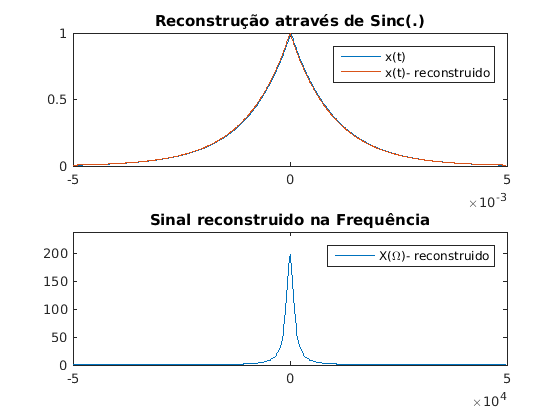

In [25]:
%% Filtragem
B=1/Ts_min;                                                 % Banda da sinc
Am=2*Ts*B;                                                  % Amplitude do sinal
s= Am*sinc(2*B*t);                                          % Sinc 
c=conv(s,xv);                                               % Efetua a convolução
c=c(1,floor((length(t)-1)/2):floor(3*(length(t)-1)/2));     % Ajusta o tamanho do vetor (/2)
% Plotting
fig=figure;
fig.PaperUnits = 'inches';
subplot(2,1,1)
plot(t,c,t,xv)
legend('x(t)','x(t)- reconstruido')
title('Reconstrução através de Sinc(.)')

%% Aplicando a transformada de Fourier ao sinal Amostrado 5kHz
C=dtft(c,t,freq);                                          % Espectro do sinal DTFT   
subplot(2,1,2)
% Plotting
plot(freq,abs(C))
title('Sinal reconstruido na Frequência')
legend('X(\Omega)- reconstruido')
axis([-50000 50000 0 1.2*max(abs(C))])
Error=max(abs(c-exp(-1000*abs(t))))                       % Cálculo do Erro

O erro é de $E\approx2\%$ ocorrendo pelo baixo aliasing ja que nosso criério foi encontrar a frequência cuja cauda tivesse $1\%$ da amplitude do espectro da frequência.   